In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
import random
import math
import goto
from goto import with_goto

In [2]:
# GRID FORMATION
def grid_formation():
    grid = []
    max_limit_l = 500
    max_limit_b = 500
    limit = 20
    for i in range(limit,max_limit_l,limit):
        for j in range(limit,max_limit_l,limit):
            arr = [i,j]
            grid.append(arr)
    x = []
    y = []
    for i in range(len(grid)):
        x.append(grid[i][0])
        y.append(grid[i][1])
    return grid,x,y

In [3]:
grid_1,x_1,y_1 = grid_formation()
grid,x,y = grid_formation()

In [4]:
# UNIFORM AND RANDOM PLACEMENT OF TARGETS
def target_placement(n_targets, grid):
    index = []
    target_location = []
    for i in range(0, n_targets):
        n = random.randint(1, len(grid))
        index.append(n)
    for j in index:
        target_location.append(grid[j])
        x_t = []
        y_t = []
        for k in range(len(target_location)):
            x_t.append(target_location[k][0])
            y_t.append(target_location[k][1])
    return target_location,x_t,y_t

In [5]:
target_location_final, x_t, y_t = target_placement(17, grid)

def remove_element(v1,v2):
    index_of_target = []
    for i in range(len(v2)):
        for j in range(len(v1)):
            if (v2[i] == v1[j]):
                index_of_target.append(j)
    for ele in sorted(index_of_target, reverse = True): 
        del v1[ele]
    return v1

In [6]:
sensor_locations = remove_element(grid, target_location_final)

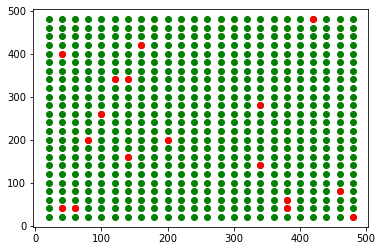

In [7]:
plt.scatter(x, y, c = 'g')
plt.scatter(x_t, y_t, c = 'r')

In [8]:
def euclidean_dist(p1,p2):
    e_dist = sum([(x - t) ** 2 for x,t in zip(p1,p2)])
    e_dist = math.sqrt(e_dist)
    return e_dist

def power_vector(target, sensor, rk):
    pv = []
    for i in range(len(target)):
        temp = []
        for j in range(len(sensor)):
            if (euclidean_dist(sensor[j], target[i]) < rk):
                temp.append(1)
            else:
                temp.append(0)
        pv.append(temp)
    return pv

In [9]:
def objective_function(power_vector):
    cost = 300
    cost_arr = []
    for j in range(len(power_vector)):
        cost_arr.append(sum([cost * i for i in power_vector[j]]))
    return (sum(cost_arr))

In [10]:
# selecting random number of sensors and defining the initial position
num = random.randint(1, 5)
initial_position = random.sample(sensor_locations, num)
initial_power_vectors = power_vector(target_location_final, initial_position, 100) 

# print(num)
# print(initial_position)
# print(initial_power_vectors)

for i in range(10):

    found_num = []
    found_pos = []

    counter = 0
    for k in range(len(initial_power_vectors)):
        if sum(initial_power_vectors[k]) > 0:
            counter += 0
        else:
            counter += 1

    # correct_pos = remove_element(initial_position, incorrect_pos)

    if counter == 0:
        new_cost = objective_function(initial_power_vectors)
    else:
        for k in range(50000):
            my_list = random.sample(sensor_locations, num)
            power_vec_new = power_vector(target_location_final, my_list, 100)
            c = 0
            for k in range(len(power_vec_new)):
                if sum(power_vec_new[k]) > 0:
                    c += 0
                else:
                    c += 1
            if c == 0:
                found_num.append(num)
                found_pos.append(my_list)
                break
        if c > 0:
            num += 1
        else:
            break
print(found_num)
print(num)
print(found_pos)

[8]
8
[[[480, 60], [200, 220], [100, 180], [460, 480], [20, 80], [120, 360], [320, 220], [340, 60]]]


In [ ]:
# def simulated_annealing(sensor_loc, target_loc):
    
#     # selecting random number of sensors and defining the initial position
#     num = random.randint(15, 25)
#     initial_position = random.sample(sensor_loc, num)
#     initial_power_vectors = power_vector(target_loc,initial_position, 70) 
    
#     found_num = []
#     found_pos = []
#     counter = 0
#     for k in range(len(initial_power_vectors)):
#         if sum(power_vector_stored[k]) > 0:
#             counter += 0
#         else:
#             counter += 1
    
#     if counter == 0:
#         new_cost = objective_function(initial_power_vectors)
#     else:
#         for k in range(3000):
#             my_list = random.sample(sensor_loc, num)
#             power_vec_new = power_vector(target_loc, my_list, 70)
#             c = 0
#             for k in range(len(power_vec_new)):
#                 if sum(power_vec_new[k]) > 0:
#                     c += 0
#                 else:
#                     c += 1
#             if c == 0:
#                 found_num.append(num)
#                 found_pos.append(my_list)
#                 break
#             else:
#                 num += 1
        
        
        
    
    
    
    

In [ ]:
# best = len(sensor_locations)
# best_eval = objective_function(power_vector(target_location_final, sensor_locations, 100))
# print(f"Initial cost with all sensors: {best_eval}")

# curr, curr_eval = best, best_eval
    
# removed_sensor_list = []

# checker = True
# times = 0
# for i in range(1000):
#     while checker:
#         random_item = random.choice(sensor_locations)
#         removed_sensor_list.append(random_item)

#         my_list = remove_element(sensor_locations, removed_sensor_list)
#         print(f"Number of sensors: {len(my_list)}")
#         power_vector_stored = power_vector(target_location_final, my_list, 100)
#         counter = 0
#         for k in range(len(power_vector_stored)):
#             if sum(power_vector_stored[k]) > 0:
#                 counter += 0
#             else:
#                 counter += 1

#         if counter > 0:
#             for k in range(500):
#                 my_list = random.sample(grid_1, len(my_list))
#                 power_vec_new = power_vector(target_location_final, my_list, 100)
#                 c = 0
#                 for k in range(len(power_vec_new)):
#                     if sum(power_vec_new[k]) > 0:
#                         c += 0
#                     else:
#                         c += 1
#             if c > 0:
#                 if (times < 5):
#                     checker = True
#                     times += 1
#                 else:
#                     checker = False
#                     print("optimization reached")
                    

#         elif counter == 0:
#             new = len(my_list)
#             new_eval = objective_function(power_vector(target_location_final, my_list, 100))
#             print(f"New cost: {new_eval}")

In [16]:
my_list[1][0]

200

In [17]:
useless_sensors = []
count = 0
for k in range(len(my_list)):
    for j in range(len(target_location_final)):
        if (euclidean_dist(target_location_final[j],my_list[k]) > 100):
            count += 1
        else:
            count += 0
    if (count == len(target_location_final)):
        useless_sensors.append(my_list[k])

In [18]:
power_vector(target_location_final, my_list, 100)

[[0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0]]

In [19]:
x_f = []
y_f = []
for k in range(len(my_list)):
    x_f.append(my_list[k][0])
    y_f.append(my_list[k][1])

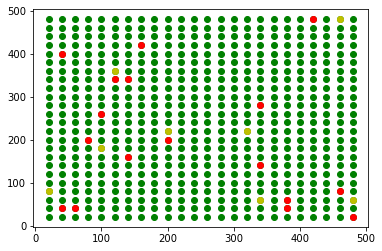

In [20]:
plt.scatter(x, y, c = 'g')
plt.scatter(x_f, y_f, c = 'y')
plt.scatter(x_t, y_t, c = 'r')

In [ ]:
# best = len(sensor_locations)
# best_eval = objective_function(power_vector(target_location_final, sensor_locations, 5))
# print(f"Initial cost with all sensors: {best_eval}")

# curr, curr_eval = best, best_eval
    
# removed_sensor_list = []

# checker = True

# for i in range(1000):
#     while checker:
#         random_item = random.choice(sensor_locations)
#         removed_sensor_list.append(random_item)

#         my_list = remove_element(sensor_locations, removed_sensor_list)
#         print(len(my_list))
#         power_vector_stored = power_vector(target_location_final, my_list, 5)
#         counter = 0
#         for k in range(len(power_vector_stored)):
#             if sum(power_vector_stored[k]) > 1:
#                 counter += 0
#             else:
#                 counter += 1

#         if counter > 0:
#             for k in range(500):
#                 my_list = random.sample(grid_1, len(my_list))
#                 power_vec_new = power_vector(target_location_final, my_list, 5)
#                 c = 0
#                 for k in range(len(power_vec_new)):
#                     if sum(power_vec_new[k]) > 0:
#                         c += 0
#                     else:
#                         c += 1
#             if c > 0:
#                 checker = False
#                 print("optimization reached")

#         elif counter == 0:
#             new = len(my_list)
#             new_eval = objective_function(power_vector(target_location_final, my_list, 5))
#             print(new_eval)